In [3]:
import pycaret

In [4]:
from pycaret.time_series import TSForecastingExperiment

In [1]:
import scipy

In [74]:
scipy.__version__

'1.10.1'

In [ ]:
# 1.10.1

In [22]:
!echo "y"|pip uninstall scipy

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Would remove:
    /Users/admin/anaconda3/lib/python3.11/site-packages/scipy-1.10.1.dist-info/*
    /Users/admin/anaconda3/lib/python3.11/site-packages/scipy/*
Proceed (Y/n)?   Successfully uninstalled scipy-1.10.1


In [23]:
!pip install scipy==1.10.1

  Obtaining dependency information for scipy==1.10.1 from https://files.pythonhosted.org/packages/0d/3e/d05b9de83677195886fb79844fcca19609a538db63b1790fa373155bc3cf/scipy-1.10.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached scipy-1.10.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (100 kB)
Using cached scipy-1.10.1-cp311-cp311-macosx_12_0_arm64.whl (28.7 MB)


In [9]:
!pip install xxhash joblib==1.3.2 matplotlib==3.7.1 pandas==2.1.4

  Obtaining dependency information for xxhash from https://files.pythonhosted.org/packages/9c/0a/d0fd8d78c8a2c3c3b34e7a9dccf85f01bf38f32e0228d107fa3903e0981f/xxhash-3.4.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for joblib==1.3.2 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib==3.7.1 from https://files.pythonhosted.org/packages/5d/7e/0647f19705d819d2249df96625d83ff5de2e913a247610b753c504b7bfd0/matplotlib-3.7.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pandas==2.1.4 from https://files.pythonhosted.org/packages/3e/89/cbca600319463a91ae6a46e537d548900ddf2114df66c902344c4fe6bb4c/pandas-2.1.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 6.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.

In [5]:
import pandas as pd

In [11]:
df = pd.read_csv('특별자치구.csv', parse_dates=['YMD_CD'], index_col='Unnamed: 0')

In [12]:
df

,YMD_CD,SMCL_CD,PRST_NO,ITEM_CD,SALE_QTY,day_0,day_1,day_2,day_3,day_4,...,WEEKDAY,FRIDAY,HOLIDAY,SALE_QTY_lag1,SALE_QTY_lag2,SALE_QTY_lag3,SALE_QTY_lag4,SALE_QTY_lag5,SALE_QTY_lag6,SALE_QTY_lag7
800,2022-12-04,38,34984,76224935,0,0,0,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,2022-12-04,38,34984,80001249,0,0,0,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
802,2022-12-04,38,34984,80001263,0,0,0,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803,2022-12-04,38,34984,80176732,0,0,0,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804,2022-12-04,38,34984,80906032,0,0,0,0,0,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60995999,2024-04-04,135,221915,9310441005269,0,0,0,0,1,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60996000,2024-04-04,135,221915,9310441005290,0,0,0,0,1,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60996001,2024-04-04,135,221915,9329982020877,0,0,0,0,1,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60996002,2024-04-04,135,221915,9414453903794,0,0,0,0,1,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3388672 entries, 800 to 60996003
Data columns (total 22 columns):
 #   Column         Dtype         
---  ------         -----         
 0   YMD_CD         datetime64[ns]
 1   SMCL_CD        int64         
 2   PRST_NO        int64         
 3   ITEM_CD        int64         
 4   SALE_QTY       int64         
 5   day_0          int64         
 6   day_1          int64         
 7   day_2          int64         
 8   day_3          int64         
 9   day_4          int64         
 10  day_5          int64         
 11  day_6          int64         
 12  WEEKDAY        int64         
 13  FRIDAY         int64         
 14  HOLIDAY        int64         
 15  SALE_QTY_lag1  float64       
 16  SALE_QTY_lag2  float64       
 17  SALE_QTY_lag3  float64       
 18  SALE_QTY_lag4  float64       
 19  SALE_QTY_lag5  float64       
 20  SALE_QTY_lag6  float64       
 21  SALE_QTY_lag7  float64       
dtypes: datetime64[ns](1), float64(7), int64(14)


In [14]:
target = 'SALE_QTY'

In [15]:
item_cd = 8801858011024 #카스캔
prst_no = 221327 # 제주 입건행복점 

In [16]:
filtered_df = df[(df['PRST_NO'] == prst_no) & (df['ITEM_CD'] == item_cd)]

In [18]:
filtered_df = filtered_df.fillna(0)

In [19]:
filtered_df

,YMD_CD,SMCL_CD,PRST_NO,ITEM_CD,SALE_QTY,day_0,day_1,day_2,day_3,day_4,...,WEEKDAY,FRIDAY,HOLIDAY,SALE_QTY_lag1,SALE_QTY_lag2,SALE_QTY_lag3,SALE_QTY_lag4,SALE_QTY_lag5,SALE_QTY_lag6,SALE_QTY_lag7
111213,2022-12-04,134,221327,8801858011024,9,0,0,0,0,0,...,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236205,2022-12-05,134,221327,8801858011024,8,1,0,0,0,0,...,1,0,0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
361197,2022-12-06,134,221327,8801858011024,5,0,1,0,0,0,...,1,0,0,8.0,9.0,0.0,0.0,0.0,0.0,0.0
486189,2022-12-07,134,221327,8801858011024,4,0,0,1,0,0,...,1,0,0,5.0,8.0,9.0,0.0,0.0,0.0,0.0
611181,2022-12-08,134,221327,8801858011024,2,0,0,0,1,0,...,1,0,0,4.0,5.0,8.0,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60482349,2024-03-31,134,221327,8801858011024,8,0,0,0,0,0,...,0,0,1,17.0,7.0,5.0,18.0,5.0,27.0,22.0
60607341,2024-04-01,134,221327,8801858011024,6,1,0,0,0,0,...,1,0,0,8.0,17.0,7.0,5.0,18.0,5.0,27.0
60732333,2024-04-02,134,221327,8801858011024,5,0,1,0,0,0,...,1,0,0,6.0,8.0,17.0,7.0,5.0,18.0,5.0
60857325,2024-04-03,134,221327,8801858011024,10,0,0,1,0,0,...,1,0,0,5.0,6.0,8.0,17.0,7.0,5.0,18.0


In [20]:
data = filtered_df

In [21]:
eda = TSForecastingExperiment()

In [22]:
# 노트북을 위한 global fugure 설정
global_fig_settings = {
    # 'renderer': 'notebook',
    "renderer": "png",  # 'notebook' 으로 설정시 interactive 시각화 가능
    "width": 1000,
    "height": 600,
}

In [23]:
eda.setup(
    data=data,  # 데이터프레임 전달
    target=target,  # 예측 컬럼
    index="YMD_CD",  # Time 컬럼
    # Forecast Horizon: 예측할 미래 기간을 입력합니다.
    fh=91,
    # 'drift', 'linear', 'nearest', 'mean', 'median', 'backfill', 'bfill', 'pad', 'ffill', 'random'
    numeric_imputation_target="drift",
    # 'drift', 'linear', 'nearest', 'mean', 'median', 'backfill', 'bfill', 'pad', 'ffill', 'random'
    numeric_imputation_exogenous="drift",
    fig_kwargs=global_fig_settings,  # 플롯에 대한 기본 설정을 지정합니다
    session_id=42,
)

,Description,Value
0,session_id,42
1,Target,SALE_QTY
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(488, 21)"
5,Transformed data shape,"(488, 21)"
6,Transformed train set shape,"(397, 21)"
7,Transformed test set shape,"(91, 21)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
eda.plot_model(
    fig_kwargs={
        "renderer": "png",  # 'notebook' 으로 설정시 interactive 플롯을 생성합니다.
        "width": 1000,
        "height": 1200,
    }
)

In [ ]:
# 시계열 데이터 시각화 with 세부설정
eda.plot_model(
    plot="ts",
    fig_kwargs={
        "height": 1200,
        # resampler_kwargs를 사용하여, plotly-resampler 객체의 생성자를 구성할 수 있습니다.
        "resampler_kwargs": {
            "default_n_shown_samples": 1500,
            # show_dash kwargs는 show_dash (render) 메서드의 kwargs를 보류합니다.
            "show_dash": {"mode": "inline", "port": 8055},
        },
    },
    display_format='plotly-dash', # interactive 시각화 출력을 원한다면 주석을 해제 합니다.
    # display_format="plotly-widget",  # interactive 시각화 출력을 원한다면 주석을 해제 합니다.
)

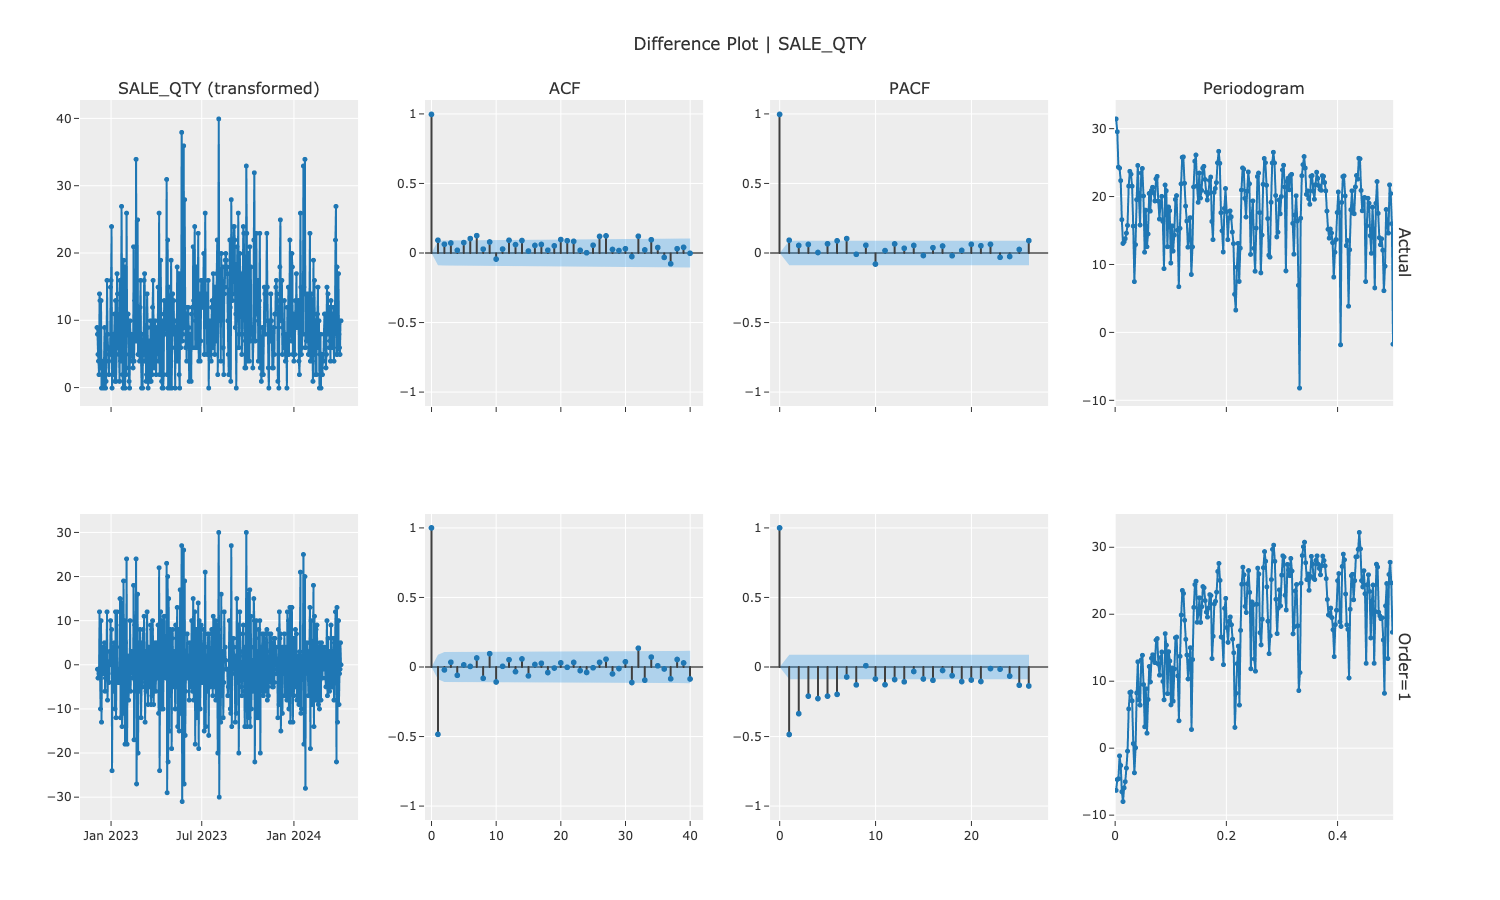

In [28]:
# 기본적으로 원본 데이터를 첫 번째 차분(order d = 1)과 함께 그래프로 그립니다.
eda.plot_model(
    plot="diff",
    fig_kwargs={
        "width": 1500,
        "height": 900,
        # plotly-widget을 사용할 때는 show_dash kwargs를 전달할 필요가 없습니다.
        "resampler_kwargs": {"default_n_shown_samples": 1500},
    },
    data_kwargs={"acf": True, "pacf": True, "periodogram": True},
    # display_format='plotly-dash', # interactive 시각화 출력을 원한다면 주석을 해제 합니다.
    # display_format='plotly-widget', # interactive 시각화 출력을 원한다면 주석을 해제 합니다.
)

In [ ]:
# 차분에 대한 시각화
eda.plot_model(
    plot="diff",
    fig_kwargs={
        "width": 1500,
        "height": 900,
        "resampler_kwargs": {
            "default_n_shown_samples": 1500,
            "show_dash": {"mode": "inline", "port": 8056},
        },
    },
    data_kwargs={
        "lags_list": [1, [1, 24]],
        "acf": True,
        "pacf": True,
        "periodogram": True,
    },
    # display_format='plotly-dash',    # interactive 시각화 출력을 원한다면 주석을 해제 합니다.
    # display_format="plotly-widget",  # interactive 시각화 출력을 원한다면 주석을 해제 합니다.
)

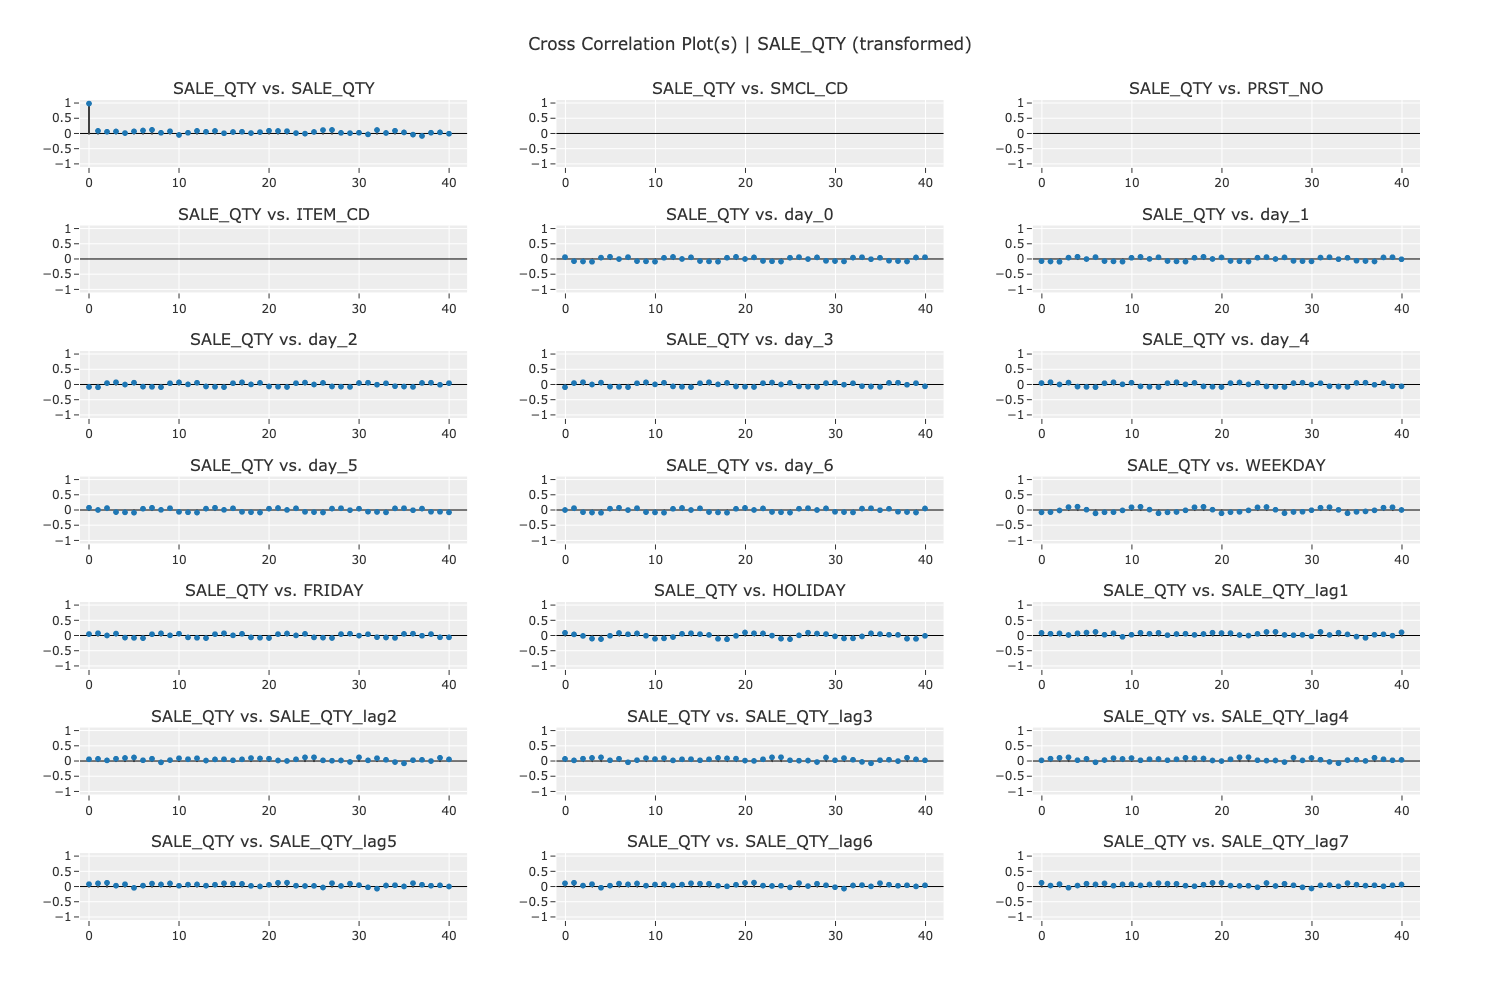

In [30]:
# Cross Correlation Plot 시각화
eda.plot_model(plot="ccf", fig_kwargs={"height": 1000, "width": 1500})

In [32]:
# 시계열 실험(Experiment) 객체를 생성합니다.
exp_uni = TSForecastingExperiment()

In [33]:
# 설정 값 지정
exp_uni.setup(
    data=data[target],
    fh=48,  # (예측 time-step) forecast horizon 설정
    numeric_imputation_target="linear",
    numeric_imputation_exogenous="linear",
    fig_kwargs=global_fig_settings,
    session_id=42,
)

,Description,Value
0,session_id,42
1,Target,SALE_QTY
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(488, 1)"
5,Transformed data shape,"(488, 1)"
6,Transformed train set shape,"(440, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [35]:
# 'arima' 모델을 생성합니다.
model = exp_uni.create_model(
    "arima",  # ARIMA, SARIMA, SARIMAX 등을 커버. 모두 동일하게 arima 로 지정
    order=(0, 1, 0),  # (p, d, q)
    seasonal_order=(0, 1, 0, 31),  # (p, d, q, s)
)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:14:48
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,ARIMA


ValueError: y_test indices do not match y_pred_indices or split/prediction length does not match forecast horizon.

In [37]:
exp_auto = TSForecastingExperiment()

exp_auto.setup(
    data=data,
    target=target,
    fh=91,
    # enforce_exogenous=False --> 모델이 지원하는 경우 다변량 예측을 사용하고, 그렇지 않은 경우 단일 변수 예측을 사용합니다.
    enforce_exogenous=False,
    numeric_imputation_target="drift",
    numeric_imputation_exogenous="linear",
    fig_kwargs=global_fig_settings,
    session_id=42,
)

,Description,Value
0,session_id,42
1,Target,SALE_QTY
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(488, 22)"
5,Transformed data shape,"(488, 22)"
6,Transformed train set shape,"(397, 22)"
7,Transformed test set shape,"(91, 22)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [45]:
metric = "MAE"  # 평가지표

# 예측에 제외할 모델명 입력
exclude_models = [
    "auto_arima",
    "bats",
    "tbats",
    "lar_cds_dt",
    "par_cds_dt",
]

In [46]:
# 사용 가능한 모델 확인하기
exp_auto.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [47]:
# Prophet과 같은 느린 모델을 포함(turbo=False) 하되, 특정 모델을 제외합니다.
best = exp_auto.compare_models(sort=metric, turbo=False)

In [48]:
exp = TSForecastingExperiment()

In [51]:
data

,YMD_CD,SMCL_CD,PRST_NO,ITEM_CD,SALE_QTY,day_0,day_1,day_2,day_3,day_4,...,WEEKDAY,FRIDAY,HOLIDAY,SALE_QTY_lag1,SALE_QTY_lag2,SALE_QTY_lag3,SALE_QTY_lag4,SALE_QTY_lag5,SALE_QTY_lag6,SALE_QTY_lag7
111213,2022-12-04,134,221327,8801858011024,9,0,0,0,0,0,...,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236205,2022-12-05,134,221327,8801858011024,8,1,0,0,0,0,...,1,0,0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
361197,2022-12-06,134,221327,8801858011024,5,0,1,0,0,0,...,1,0,0,8.0,9.0,0.0,0.0,0.0,0.0,0.0
486189,2022-12-07,134,221327,8801858011024,4,0,0,1,0,0,...,1,0,0,5.0,8.0,9.0,0.0,0.0,0.0,0.0
611181,2022-12-08,134,221327,8801858011024,2,0,0,0,1,0,...,1,0,0,4.0,5.0,8.0,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60482349,2024-03-31,134,221327,8801858011024,8,0,0,0,0,0,...,0,0,1,17.0,7.0,5.0,18.0,5.0,27.0,22.0
60607341,2024-04-01,134,221327,8801858011024,6,1,0,0,0,0,...,1,0,0,8.0,17.0,7.0,5.0,18.0,5.0,27.0
60732333,2024-04-02,134,221327,8801858011024,5,0,1,0,0,0,...,1,0,0,6.0,8.0,17.0,7.0,5.0,18.0,5.0
60857325,2024-04-03,134,221327,8801858011024,10,0,0,1,0,0,...,1,0,0,5.0,6.0,8.0,17.0,7.0,5.0,18.0


In [50]:
train_df = data[data['YMD_CD'].dt.year == 2023]
test_df = data[data['YMD_CD'].dt.year == 2024]

In [62]:
train_df

,YMD_CD,SMCL_CD,PRST_NO,ITEM_CD,SALE_QTY,day_0,day_1,day_2,day_3,day_4,...,WEEKDAY,FRIDAY,HOLIDAY,SALE_QTY_lag1,SALE_QTY_lag2,SALE_QTY_lag3,SALE_QTY_lag4,SALE_QTY_lag5,SALE_QTY_lag6,SALE_QTY_lag7
3610989,2023-01-01,134,221327,8801858011024,16,0,0,0,0,0,...,0,0,1,15.0,5.0,5.0,2.0,6.0,6.0,8.0
3735981,2023-01-02,134,221327,8801858011024,24,1,0,0,0,0,...,1,0,0,16.0,15.0,5.0,5.0,2.0,6.0,6.0
3860973,2023-01-03,134,221327,8801858011024,0,0,1,0,0,0,...,1,0,0,24.0,16.0,15.0,5.0,5.0,2.0,6.0
3985965,2023-01-04,134,221327,8801858011024,4,0,0,1,0,0,...,1,0,0,0.0,24.0,16.0,15.0,5.0,5.0,2.0
4110957,2023-01-05,134,221327,8801858011024,8,0,0,0,1,0,...,1,0,0,4.0,0.0,24.0,16.0,15.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48608109,2023-12-27,134,221327,8801858011024,7,0,0,1,0,0,...,1,0,0,11.0,9.0,22.0,9.0,5.0,15.0,5.0
48733101,2023-12-28,134,221327,8801858011024,20,0,0,0,1,0,...,1,0,0,7.0,11.0,9.0,22.0,9.0,5.0,15.0
48858093,2023-12-29,134,221327,8801858011024,18,0,0,0,0,1,...,1,1,0,20.0,7.0,11.0,9.0,22.0,9.0,5.0
48983085,2023-12-30,134,221327,8801858011024,5,0,0,0,0,0,...,0,0,1,18.0,20.0,7.0,11.0,9.0,22.0,9.0


In [71]:
exp_name = exp.setup(data = train_df,  
                     fh = 5, 
                     enforce_exogenous=False,
                     # categorical_features=['SMCL_CD', 'PRST_NO', 'ITEM_CD', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'WEEKDAY', 'FRIDAY', 'HOLIDAY'],
                     target='SALE_QTY', 
                     index='YMD_CD', 
                     numeric_imputation_exogenous=0)

,Description,Value
0,session_id,8889
1,Target,SALE_QTY
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(365, 21)"
5,Transformed data shape,"(365, 21)"
6,Transformed train set shape,"(360, 21)"
7,Transformed test set shape,"(5, 21)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [72]:
model = exp.compare_models(turbo=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
croston,Croston,0.6124,0.5892,4.5147,5.6008,2668182918279958.5000,0.5546,-0.5553,0.0167
tbats,TBATS,0.6267,0.5942,4.6204,5.6487,3033874322522439.5000,0.5557,-0.6109,2.6600
grand_means,Grand Means Forecaster,0.6318,0.5899,4.6576,5.6075,3166244995166572.5000,0.5573,-0.5669,0.4867
theta,Theta Forecaster,0.6361,0.6019,4.6897,5.7215,3091366673811359.5000,0.5601,-0.6779,0.0133
ets,ETS,0.6837,0.6404,5.0405,6.0861,2998167576287849.5000,0.6054,-0.7771,0.0833
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.6879,0.6437,5.0722,6.1196,2743609299635900.0000,0.5977,-0.9355,0.1133
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.6961,0.6395,5.1321,6.0788,3218732026191074.5000,0.6044,-0.8263,0.0667
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.7027,0.6493,5.1808,6.1728,2911267472903233.0000,0.6048,-0.9740,0.1300
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.7027,0.6493,5.1809,6.1728,2911339068499107.5000,0.6048,-0.9740,0.0533
naive,Naive Forecaster,0.7058,0.5997,5.2000,5.6978,1200959900632132.7500,0.6743,-0.3985,1.8767


In [73]:
# best 모델로 시각화
exp.plot_model(model)

In [70]:
# BATS 모델 생성
bats_model = exp.create_model('bats')

# 모델 시각화
exp.plot_model(bats_model, plot='forecast')

# 다양한 시각화 옵션
exp.plot_model(bats_model, plot='decomp')      # 시계열 분해
exp.plot_model(bats_model, plot='diagnostics') # 모델 진단

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2023-12-27,1.0518,0.8149,7.6887,7.6887,0.3844,0.4759
1,2023-12-28,1.0289,0.7973,7.5140,7.5140,0.4174,0.5276
2,2023-12-29,0.0396,0.0307,0.2887,0.2887,0.0577,0.0595
Mean,NaT,0.7068,0.5476,5.1638,5.1638,0.2865,0.3543
SD,NaT,0.4718,0.3656,3.4479,3.4479,0.1623,0.2096
